In [1]:
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

In [2]:
def extract_feature(file_name):
    
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        stft=np.abs(librosa.stft(audio))
        mfccs=np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=21).T,axis=0)
        chroma_stft=np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(audio, sr=sample_rate).T,axis=0)
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sample_rate).T,axis=0)
        
   # except Exception as e:
    #    print("Error encountered while parsing file: ", file)
     #   return None
    
        return mfccs,chroma_stft,mel,contrast,tonnetz

In [3]:
start_time= timer()
mfccs,chroma,mel,contrast,tonnetz= extract_feature('E:/Thesis/Dataset/UrbanSound8K/audio/fold3/6988-5-0-4.wav')
end_time=timer()
print('time to extract features from one file: {:.3f}sec'.format((end_time-start_time)/60))

C:\Users\User\Anaconda3\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


time to extract features from one file: 0.032sec


In [5]:
print(mfccs.shape,chroma.shape,mel.shape,contrast.shape,tonnetz.shape)

(21,) (12,) (128,) (7,) (6,)


In [8]:
metadata=pd.read_csv('E:/Thesis/Dataset/UrbanSound8K/Augmented_metadata/UrbanSound8k_Augmented.csv')
metadata_ori=pd.read_csv('E:/Thesis/Dataset/UrbanSound8K/metadata/UrbanSound8K.csv')

In [7]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [9]:
Augment_list= ['pitch_2', 'pitch_-2','pitch_time290','pitch_time-290','pitch_time2110','pitch_time-2110','speed_90','speed_110']

In [10]:
stacked_features = []
exceptions=0
count=0

start_time = timer()
for i in range(10):
    for j in range(8):
  
        mypath = 'E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/'+ fold_list[i] + '/' + Augment_list[j] + '/'
        files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]

        for fn in files:
            try: 
                mfccs,chroma,mel,contrast,tonnetz = extract_feature(fn)
                features = np.empty((0,174))
                ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
                features = np.reshape(np.vstack([features,ext_features]),(29,6))
            


            except: 
                print(fn)
                exceptions += 1
                continue

            l_row = metadata.loc[metadata['file']==fn.split('/')[-1]].values.tolist()
            label = l_row[0][-4]
            fold = i+1
            

            stacked_features.append([features, features.shape, label, fold])

            
for i in range(10):
    
    mypath = 'E:/Thesis/Dataset/UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try:
            mfccs,chroma,mel,contrast,tonnetz = extract_feature(fn)
            features = np.empty((0,174))
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.reshape(np.vstack([features,ext_features]),(29,6))
            
        except: 
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata_ori.loc[metadata_ori['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        fold = i+1
    
        stacked_features.append([features, features.shape, label, fold])
        
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')

C:\Users\User\Anaconda3\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_2/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_-2/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time290/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time-290/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time2110/.DS_Store


C:\Users\User\Anaconda3\lib\site-packages\librosa\util\utils.py:1591: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
C:\Users\User\Anaconda3\lib\site-packages\librosa\util\utils.py:1604: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time2110/87275-1-1-0.wav
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time2110/87275-1-2-0.wav
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time-2110/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time-2110/87275-1-1-0.wav
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time-2110/87275-1-2-0.wav
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/speed_90/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/speed_110/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/speed_110/87275-1-1-0.wav
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/speed_110/87275-1-2-0.wav
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_2/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_-2/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_time290/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_t

In [11]:
cols=['Stacked_Features', 'Matrix_Shape', 'Label', 'Fold']
Stacked_feature_pd=pd.DataFrame(data=stacked_features , columns=cols)
Stacked_feature_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78582 entries, 0 to 78581
Data columns (total 4 columns):
Stacked_Features    78582 non-null object
Matrix_Shape        78582 non-null object
Label               78582 non-null object
Fold                78582 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.4+ MB


In [12]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


X = np.array(Stacked_feature_pd.Stacked_Features.tolist())
y = np.array(Stacked_feature_pd.Label.tolist())


le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

Using TensorFlow backend.


In [13]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state=42)

In [14]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, yy.shape)

(62865, 29, 6) (15717, 29, 6) (62865, 10) (15717, 10) (78582, 10)


In [16]:
x_train=np.reshape(x_train,(x_train.shape[0], 29,6,1))
x_test=np.reshape(x_test,(x_test.shape[0], 29,6,1))
print(x_train.shape, x_test.shape)

(62865, 29, 6, 1) (15717, 29, 6, 1)


In [17]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

In [18]:
model=Sequential()
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(29,6,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())
#model.add(GlobalAveragePooling2D())


model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [19]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 6, 64)         1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 3, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 3, 128)        204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 2, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [20]:
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

15717/15717 [==============================] - 11s 710us/step
Pre-training accuracy: 11.0390%


In [21]:
start_time=timer()
history=model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))
end_time=timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))

Train on 62865 samples, validate on 15717 samples
Epoch 1/30
62865/62865 [==============================] - 111s 2ms/step - loss: 1.5066 - accuracy: 0.4784 - val_loss: 0.9849 - val_accuracy: 0.6673
Epoch 2/30
62865/62865 [==============================] - 114s 2ms/step - loss: 1.0149 - accuracy: 0.6573 - val_loss: 0.6937 - val_accuracy: 0.7702
Epoch 3/30
62865/62865 [==============================] - 114s 2ms/step - loss: 0.8345 - accuracy: 0.7220 - val_loss: 0.5738 - val_accuracy: 0.8128
Epoch 4/30
62865/62865 [==============================] - 115s 2ms/step - loss: 0.7026 - accuracy: 0.7665 - val_loss: 0.4830 - val_accuracy: 0.8486
Epoch 5/30
62865/62865 [==============================] - 114s 2ms/step - loss: 0.6387 - accuracy: 0.7895 - val_loss: 0.4179 - val_accuracy: 0.8621
Epoch 6/30
62865/62865 [==============================] - 115s 2ms/step - loss: 0.5824 - accuracy: 0.8080 - val_loss: 0.3695 - val_accuracy: 0.8816
Epoch 7/30
62865/62865 [==============================] - 114s

In [22]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1]*100)

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1]*100)

Training Accuracy:  96.96492552757263
Testing Accuracy:  94.99268531799316


In [23]:
def plot_accuracy():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('No of epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def plot_loss():
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Testing')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('No of epoch')
    #plt.xlabel('No of epoch')
    plt.legend(loc="upper left")
    plt.show()

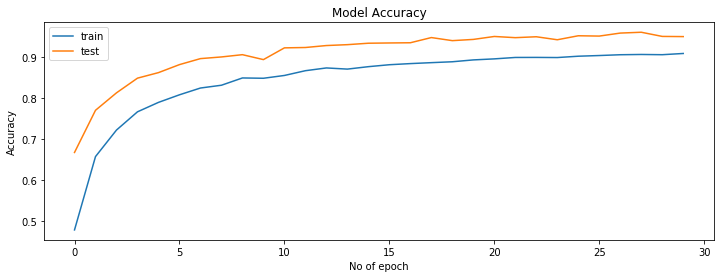

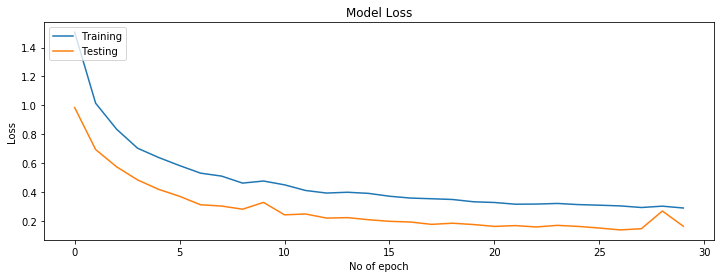

In [24]:
plt.figure(figsize=(12,4))
plot_accuracy()
plt.figure(figsize=(12,4))
plot_loss()

In [25]:
Class_Label = {'Air_conditioner':0, 'Car_horn':1, 'Children_playing':2, 'Dog_Bark':3, 
               'Drilling':4,'Engine_idling':5, 'Gun_Shot' :6, 'Jackhammer': 7 ,'Siren':8,'Street_Music':9 }

In [26]:
from sklearn.metrics import classification_report

y_true = np.argmax(y_test, axis = 1)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
labels = [0,1,2,3,4,5,6,7,8,9]
target_names = Class_Label.keys()

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=target_names))

(15717,) (15717,)
                  precision    recall  f1-score   support

 Air_conditioner       0.97      0.97      0.97      1843
        Car_horn       0.97      0.96      0.97       770
Children_playing       0.88      0.91      0.89      1799
        Dog_Bark       0.97      0.89      0.93      1741
        Drilling       0.97      0.95      0.96      1766
   Engine_idling       0.98      0.97      0.97      1828
        Gun_Shot       0.99      0.97      0.98       711
      Jackhammer       0.96      0.98      0.97      1814
           Siren       0.99      0.96      0.98      1661
    Street_Music       0.87      0.95      0.91      1784

        accuracy                           0.95     15717
       macro avg       0.96      0.95      0.95     15717
    weighted avg       0.95      0.95      0.95     15717



In [27]:
from sklearn.metrics import accuracy_score
z=np.around((accuracy_score(y_true, y_pred)*100), decimals=0)
print(z)

95.0


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[1789    1   21    0    2    3    1    7    0   19]
 [   1  739    2    3    0    1    0    0    1   23]
 [  15    1 1632   13    7    6    1    1    3  120]
 [   9    3   98 1557   10    9    3    3   13   36]
 [   6    4    5    3 1685    2    0   43    0   18]
 [   8    1   19    6    1 1769    0    3    0   21]
 [   0    1    5    2    4    0  689    2    0    8]
 [   2    0    7    1   22    0    0 1774    0    8]
 [   0    4   30    7    0    8    0    3 1598   11]
 [   8    5   43   11    5    3    0   10    1 1698]]


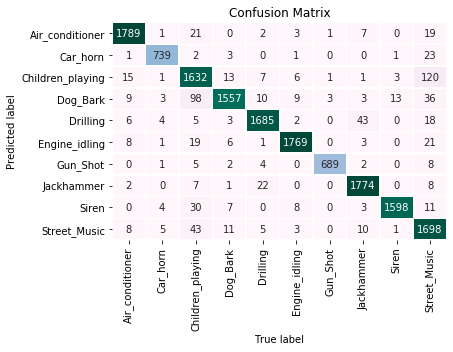

<Figure size 720x288 with 0 Axes>

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax=plt.subplot()
mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,4))
sns.heatmap(mat, square=False, annot=True, fmt='d',cbar=False,linewidths=.5,xticklabels=Class_Label.keys(),yticklabels=Class_Label.keys(), ax=ax, cmap='PuBuGn')
bottom, top= ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top -0.5)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label');

In [30]:
def acc_per_class(np_probs_array):    
    accs = []
    for idx in range(0, np_probs_array.shape[0]):
        correct = np_probs_array[idx][idx].astype(int)
        total = np_probs_array[idx].sum().astype(int)
        acc = (correct / total) * 100
        accs.append(acc)
    return accs

In [32]:
accuracies=acc_per_class(mat)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]
pd.DataFrame({'CLASS':labels, 'ACCURACY': accuracies}).sort_values(by='ACCURACY', ascending=False)

,CLASS,ACCURACY
7,Jackhammer,97.794928
0,Air Conditioner,97.069995
6,Gun Shot,96.905767
5,Engine Idling,96.772429
8,Siren,96.207104
1,Car Horn,95.974026
4,Drilling,95.413364
9,Street Music,95.179372
2,Children Playing,90.717065
3,Dog bark,89.431361


Text(0.5, 1.0, 'Accuracy per Class')

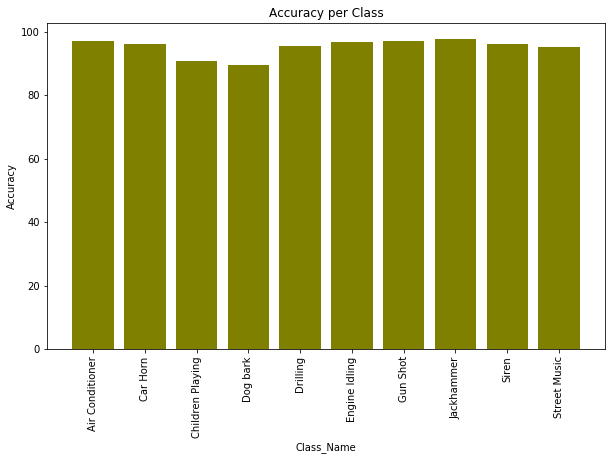

In [33]:
Y=np.around(accuracies , decimals=1)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]
index=np.arange(len(labels))
plt.figure(figsize=(10,6))
plt.bar(index, Y, color='olive')
plt.xticks(index, labels, rotation=90)
plt.xlabel('Class_Name')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')